In [88]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
from pandas import Series, DataFrame

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [4]:
pwd

'/Users/adammckenna'

In [6]:
titanic_df = pd.read_csv('train.csv')
titanic_df_test = pd.read_csv('test.csv')

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
titanic_df.info()
titanic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
person         891 non-null object
Alone          891 non-null object
Survivor       891 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


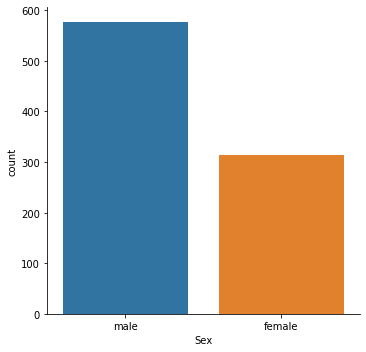

In [15]:
sns.factorplot('Sex',data=titanic_df,kind="count")


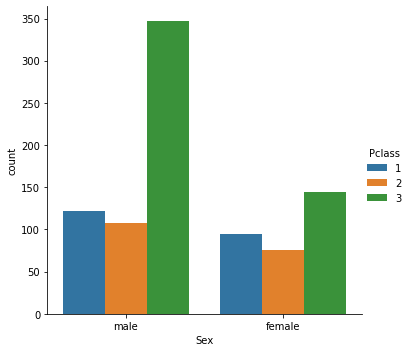

In [17]:
sns.factorplot('Sex',data=titanic_df, hue ='Pclass', kind ='count')

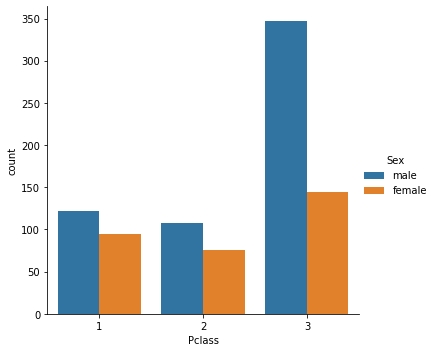

In [18]:
sns.factorplot('Pclass',data=titanic_df, hue ='Sex', kind ='count')

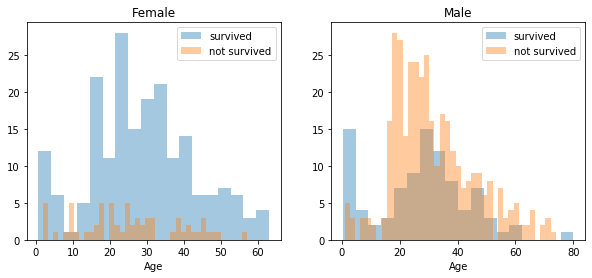

In [179]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_df[titanic_df['Sex']=='female']
men = titanic_df[titanic_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [20]:
def male_female_child(passenger):
    
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [21]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis =1)

In [22]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


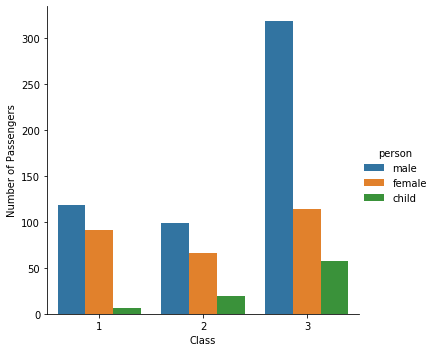

In [114]:
ax = sns.factorplot('Pclass',data=titanic_df, hue='person',kind='count')
ax.set(xlabel = 'Class', ylabel = 'Number of Passengers')

[Text(0, 0.5, 'Number of survived'), Text(0.5, 0, 'Class')]

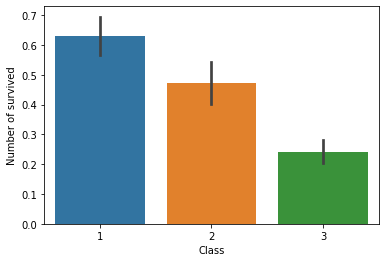

In [117]:
ax = sns.barplot(x='Pclass', y='Survived', data =titanic_df)
ax.set(xlabel = 'Class', ylabel = 'Number of survived',)

/Users/adammckenna/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


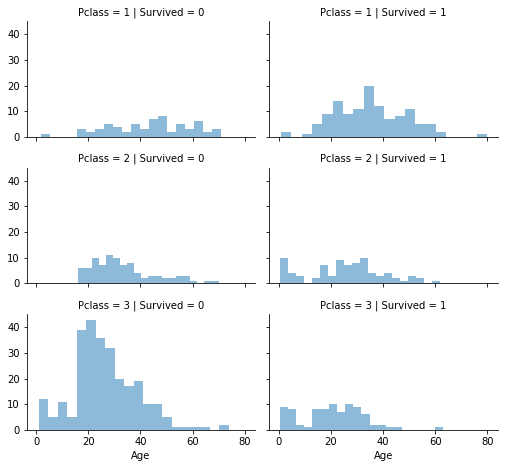

In [119]:
grid = sns.FacetGrid(titanic_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

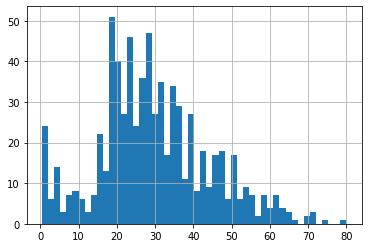

In [25]:
titanic_df['Age'].hist(bins=50)

In [26]:
titanic_df['Age'].mean()

29.69911764705882

In [27]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

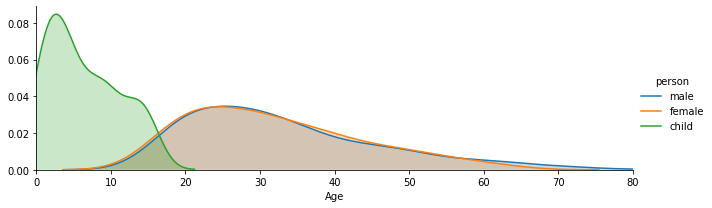

In [33]:
fig = sns.FacetGrid(titanic_df, hue='person',aspect=3)
fig.map(sns.kdeplot, 'Age',shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim  = (0,oldest))

fig.add_legend()

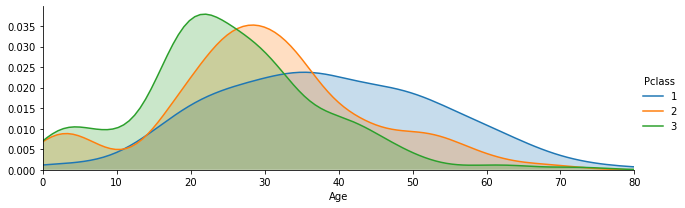

In [34]:
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=3)
fig.map(sns.kdeplot, 'Age',shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim  = (0,oldest))

fig.add_legend()

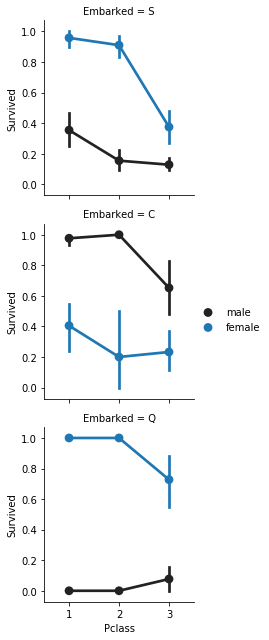

In [180]:
deck = titanic_df['Cabin'].dropna()

In [181]:
len(deck)

891

In [201]:
deck

0                0
1              C85
2                0
3             C123
4                0
5                0
6              E46
7                0
8                0
9                0
10              G6
11            C103
12               0
13               0
14               0
15               0
16               0
17               0
18               0
19               0
20               0
21             D56
22               0
23              A6
24               0
25               0
26               0
27     C23 C25 C27
28               0
29               0
          ...     
861              0
862            D17
863              0
864              0
865              0
866              0
867            A24
868              0
869              0
870              0
871            D35
872    B51 B53 B55
873              0
874              0
875              0
876              0
877              0
878              0
879            C50
880              0
881              0
882         

In [236]:
type(deck[1])

str

In [237]:
levels = []
deck_num = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for level in deck.items():
    if isinstance(deck[level], str) and deck[level][0]!='T': 
        levels.append(deck_num[level[0]])

  #  if len(deck[level]) == 1:
  #      continue 
     #   deck[level][0]!='T':
       # levels.append(deck_num[level[0]])
    
  #  levels[level] = deck_num[level]


KeyError: (0, 0)

In [185]:
cabin_df

""


In [183]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.head()
sns.factorplot('Cabin', data =cabin_df, palette='RdPu', kind='count')

ValueError: Length mismatch: Expected axis has 0 elements, new values have 1 elements

KeyError: "None of [Int64Index([3, 3, 5, 7, 3, 4, 1, 3, 2, 4,\n            ...\n            3, 4, 5, 4, 1, 4, 2, 3, 2, 3],\n           dtype='int64', length=203)] are in the [columns]"

In [178]:
len(cabin_df)

203

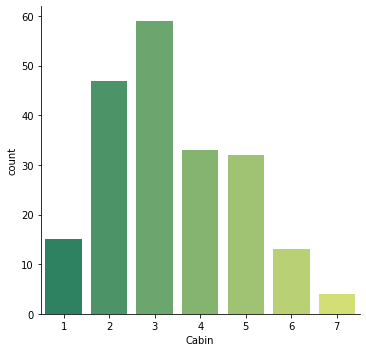

In [162]:
sns.factorplot('Cabin', data =cabin_df, palette='summer', kind='count')

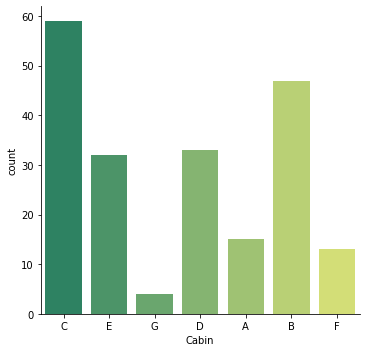

In [54]:
sns.catplot(x='Cabin', data =cabin_df, palette = 'summer', kind='count')

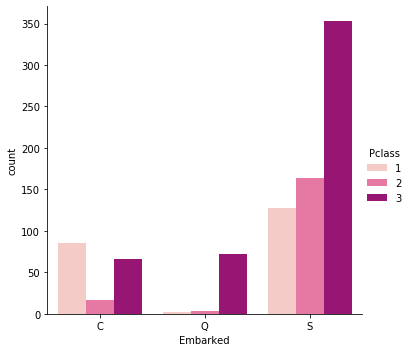

In [59]:
sns.catplot('Embarked', data = titanic_df, palette = 'RdPu', hue='Pclass', kind ='count', order=['C','Q','S'])

In [60]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [62]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [67]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

/Users/adammckenna/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [184]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,male,Alone,No


In [69]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


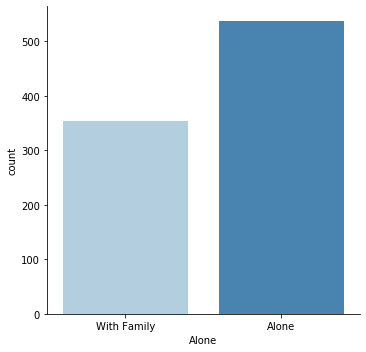

In [70]:
sns.catplot('Alone',data=titanic_df, palette='Blues',kind='count')

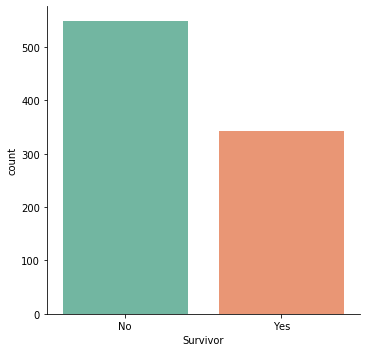

In [73]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})

sns.catplot('Survivor', data=titanic_df, palette='Set2', kind='count')

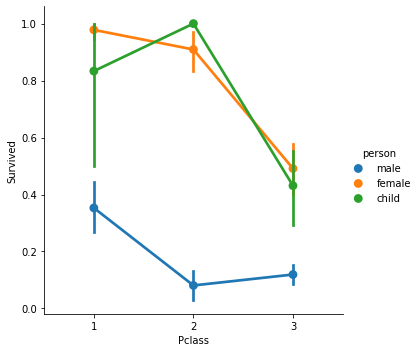

In [79]:
sns.factorplot('Pclass','Survived', hue='person', data =titanic_df)

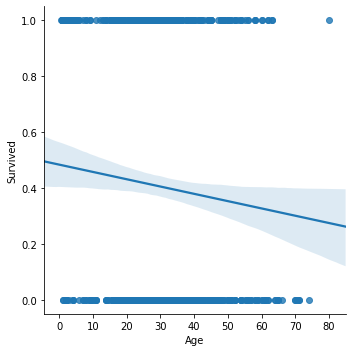

In [80]:
sns.lmplot('Age','Survived', data =titanic_df)

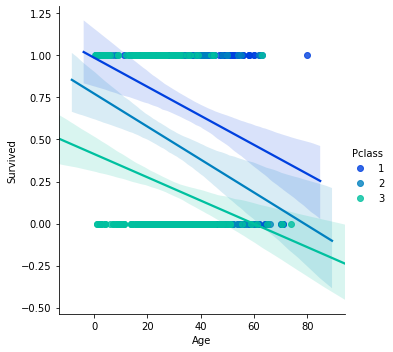

In [81]:
sns.lmplot('Age','Survived', hue='Pclass', data =titanic_df, palette = 'winter')

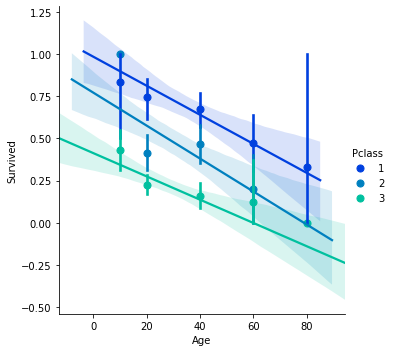

In [84]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass', data =titanic_df, palette = 'winter', x_bins = generations)

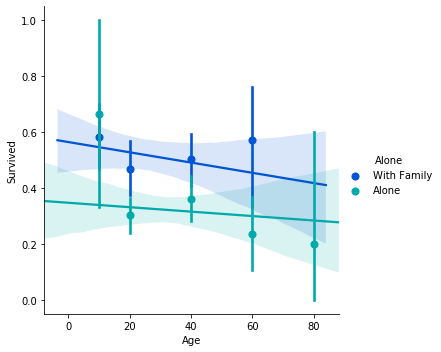

In [87]:
sns.lmplot('Age','Survived',hue='Alone',data=titanic_df, palette='winter', x_bins=generations)

In [91]:
titanic_df['Cabin']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         